In [98]:
import numpy as np
import pandas as pd
from sklearn import cluster
import kneed
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, SpectralClustering, OPTICS, DBSCAN

df = pd.read_csv("Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [99]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [100]:
df.isnull().sum()


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [101]:
df.duplicated().sum()

0

In [102]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<AxesSubplot:>

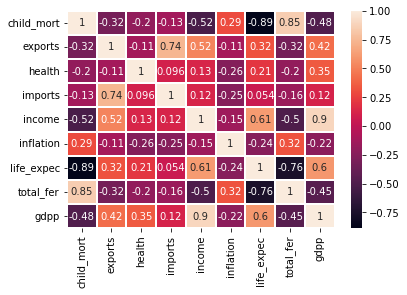

In [103]:
sns.heatmap(df.corr(), annot=True, linewidth=0.3)


In [104]:
#Normalizing data
select_data = df.drop(["country"], axis=1)
select_data
scaler = MinMaxScaler()
select_data_normalized = scaler.fit_transform(select_data)
select_data_normalized = pd.DataFrame(
    select_data_normalized, columns=select_data.columns, index=select_data.index)
select_data_normalized


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


<AxesSubplot:xlabel='gdpp', ylabel='income'>

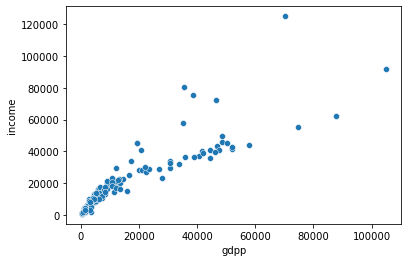

In [105]:
sns.scatterplot(data=select_data, x="gdpp", y="income")


<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

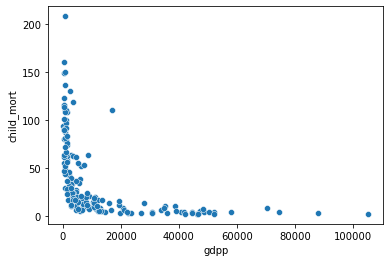

In [106]:
sns.scatterplot(data=select_data, x="gdpp", y="child_mort")


<AxesSubplot:xlabel='gdpp', ylabel='health'>

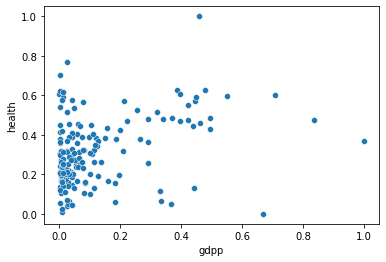

In [122]:
sns.scatterplot(data=select_data_normalized, x="gdpp", y="health")


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:xlabel='gdpp', ylabel='income'>

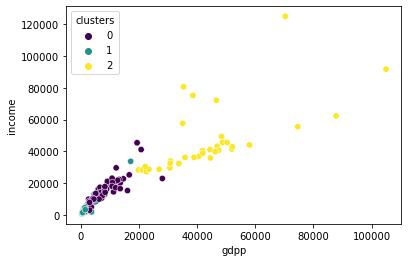

In [108]:
#clusters Kmeans
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(select_data)
    inertias.append(kmeans.inertia_)
kl = kneed.KneeLocator(range(1, 11), inertias,
                 curve="convex", direction="decreasing")
clusterNumber = kl.elbow
clusters = KMeans(clusterNumber).fit_predict(select_data_normalized)
df['clusters'] = clusters

plt.xlabel('gdpp')
plt.ylabel('income')
sns.scatterplot(data=df, x="gdpp",
                    y="income", hue='clusters', s=40, palette='viridis')


<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

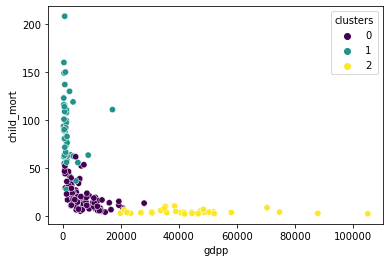

In [109]:
plt.xlabel('gdpp')
plt.ylabel('child_mort')
sns.scatterplot(data=df, x="gdpp",
                    y="child_mort", hue='clusters', s=40, palette='viridis')


<AxesSubplot:xlabel='health', ylabel='gdpp'>

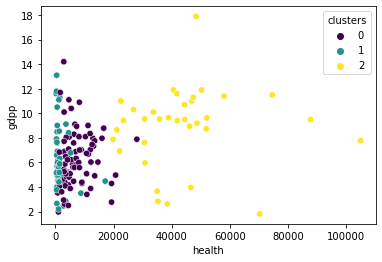

In [110]:
plt.xlabel('health')
plt.ylabel('gdpp')
sns.scatterplot(data=df, x="gdpp",
                y="health", hue='clusters', s=40, palette='viridis')


<AxesSubplot:xlabel='gdpp', ylabel='income'>

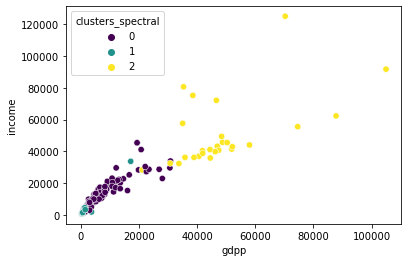

In [111]:
#clusters SpectralClustering
clusters_spectral = SpectralClustering(
    n_clusters=clusterNumber).fit_predict(select_data_normalized)
df['clusters_spectral'] = clusters_spectral

plt.xlabel('gdpp')
plt.ylabel('income')
sns.scatterplot(data=df, x="gdpp",
                y="income", hue='clusters_spectral', s=40, palette='viridis')


<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

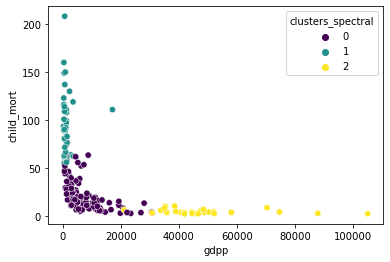

In [112]:
plt.xlabel('gdpp')
plt.ylabel('child_mort')
sns.scatterplot(data=df, x="gdpp",
                y="child_mort", hue='clusters_spectral', s=40, palette='viridis')


<AxesSubplot:xlabel='health', ylabel='gdpp'>

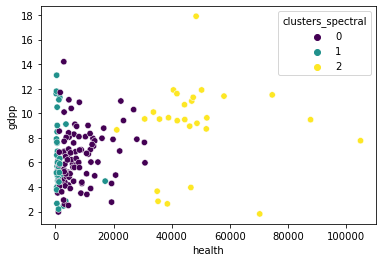

In [113]:
plt.xlabel('health')
plt.ylabel('gdpp')
sns.scatterplot(data=df, x="gdpp",
                y="health", hue='clusters_spectral', s=40, palette='viridis')


<AxesSubplot:xlabel='gdpp', ylabel='income'>

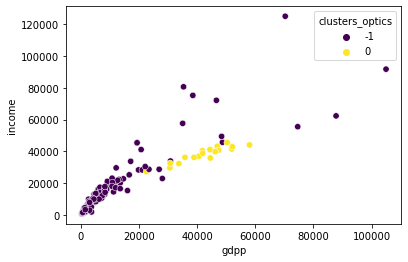

In [114]:
#Clusters Optics
clusters_optics = OPTICS(eps=0.6, min_samples=10).fit_predict(
    select_data_normalized)
df['clusters_optics'] = clusters_optics
plt.xlabel('gdpp')
plt.ylabel('income')
sns.scatterplot(data=df, x="gdpp",
                y="income", hue='clusters_optics', s=40, palette='viridis')



<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

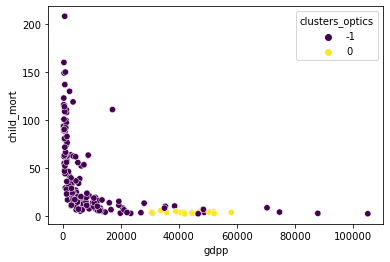

In [115]:
plt.xlabel('gdpp')
plt.ylabel('child_mort')
sns.scatterplot(data=df, x="gdpp",
                y="child_mort", hue='clusters_optics', s=40, palette='viridis')


<AxesSubplot:xlabel='health', ylabel='gdpp'>

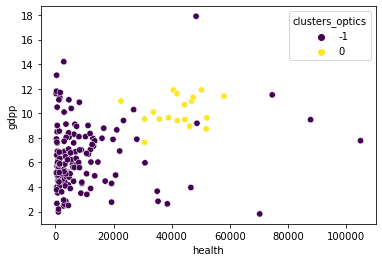

In [116]:
plt.xlabel('health')
plt.ylabel('gdpp')
sns.scatterplot(data=df, x="gdpp",
                y="health", hue='clusters_optics', s=40, palette='viridis')


<AxesSubplot:xlabel='gdpp', ylabel='income'>

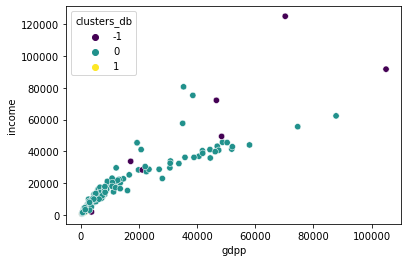

In [117]:
#Clusters DBSCAN
clusters_db = DBSCAN(eps=0.3, min_samples=2).fit_predict(
    select_data_normalized)
df['clusters_db'] = clusters_db
plt.xlabel('gdpp')
plt.ylabel('income')
sns.scatterplot(data=df, x="gdpp",
                y="income", hue='clusters_db', s=40, palette='viridis')


<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

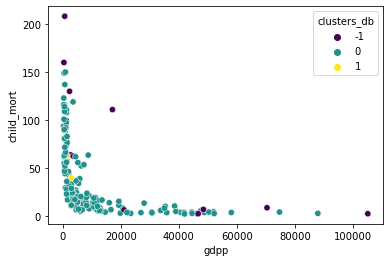

In [118]:
plt.xlabel('gdpp')
plt.ylabel('child_mort')
sns.scatterplot(data=df, x="gdpp",
                y="child_mort", hue='clusters_db', s=40, palette='viridis')


<AxesSubplot:xlabel='health', ylabel='gdpp'>

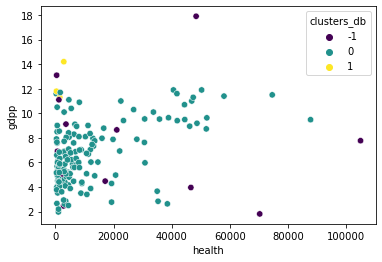

In [119]:
plt.xlabel('health')
plt.ylabel('gdpp')
sns.scatterplot(data=df, x="gdpp",
                y="health", hue='clusters_db', s=40, palette='viridis')


In [128]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,clusters_spectral,clusters_optics,clusters_db
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,-1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,-1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,-1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0,-1,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,-1,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0,-1,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,1,-1,0


In [141]:
#countries with small income
df[["country","income"]].nsmallest(7, ['income'])


,country,income
37,"Congo, Dem. Rep.",609
88,Liberia,700
26,Burundi,764
112,Niger,814
31,Central African Republic,888
106,Mozambique,918
94,Malawi,1030


In [145]:
#countries with bad health
df[["country","health"]].nsmallest(7, ['health'])

,country,health
123,Qatar,1.81
107,Myanmar,1.97
116,Pakistan,2.20
38,"Congo, Rep.",2.46
154,Turkmenistan,2.50
70,Indonesia,2.61
82,Kuwait,2.63


In [147]:
#countries with good health
df[["country","health"]].nlargest(7, ['health'])

,country,health
159,United States,17.9
101,"Micronesia, Fed. Sts.",14.2
132,Sierra Leone,13.1
54,France,11.9
110,Netherlands,11.9
88,Liberia,11.8
102,Moldova,11.7


In [142]:
#countries with large child_mort
df[["country","child_mort"]].nlargest(7, ['child_mort'])


,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0
113,Nigeria,130.0
112,Niger,123.0


In [143]:
#countries with big income
df[["country", "income"]].nlargest(7, ['income'])


,country,income
123,Qatar,125000
91,Luxembourg,91700
23,Brunei,80600
82,Kuwait,75200
133,Singapore,72100
114,Norway,62300
157,United Arab Emirates,57600


In [144]:
#countries with small child_mort
df[["country", "child_mort"]].nsmallest(7, ['child_mort'])


,country,child_mort
68,Iceland,2.6
91,Luxembourg,2.8
133,Singapore,2.8
53,Finland,3.0
144,Sweden,3.0
77,Japan,3.2
114,Norway,3.2
